In [79]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,classification_report,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [237]:
#Reading the dataset as dataframe df
df=pd.read_csv('C:\\Users\\user\\Desktop\\4050 new\\covid_data.csv')
#Displaying the top 5 rows of the csv file
df.head()

,Sample,Age,Sex,Severity,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,C1,39,male,NonICU,0.49,0.00,0.21,0.04,0.07,0.0,...,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
1,C2,63,male,NonICU,0.29,0.00,0.14,0.00,0.00,0.0,...,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
2,C3,33,male,NonICU,0.26,0.00,0.03,0.02,0.00,0.0,...,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
3,C4,49,male,NonICU,0.45,0.01,0.09,0.07,0.00,0.0,...,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
4,C5,49,male,NonICU,0.17,0.00,0.00,0.05,0.07,0.0,...,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70


In [238]:
#selecting only the continous features
X= df.drop(columns=['Sample','Sex','Severity','Age'])
X

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0.49,0.00,0.21,0.04,0.07,0.0,0.03,18.92,4.07,0.0,...,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
1,0.29,0.00,0.14,0.00,0.00,0.0,0.05,18.68,3.00,0.0,...,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
2,0.26,0.00,0.03,0.02,0.00,0.0,0.07,13.85,1.83,0.0,...,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
3,0.45,0.01,0.09,0.07,0.00,0.0,0.00,22.11,4.22,0.0,...,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
4,0.17,0.00,0.00,0.05,0.07,0.0,0.00,8.45,1.17,0.0,...,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.30,0.00,0.02,0.02,0.00,0.0,0.00,17.06,1.96,0.0,...,0.26,1.01,0.13,0.46,5.93,0.24,1.58,447.14,3.04,1.00
122,0.70,0.00,0.02,0.01,0.00,0.0,0.00,20.31,1.54,0.0,...,0.64,0.83,0.18,0.73,8.75,0.12,1.57,748.55,4.55,1.56
123,0.75,0.00,0.27,0.00,0.06,0.0,0.00,27.25,3.42,0.0,...,1.18,2.14,0.41,1.29,14.93,0.14,5.05,437.62,10.34,3.99
124,2.80,0.00,0.04,0.00,0.00,0.0,0.00,21.64,1.43,0.0,...,0.42,0.61,0.19,0.45,4.77,0.33,1.07,369.66,1.83,0.96


In [239]:
#Defining the target
y=df['Severity']

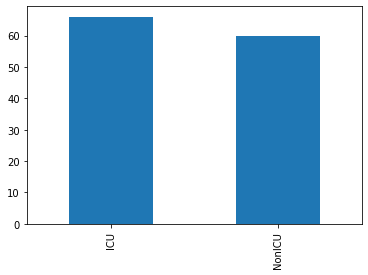

In [240]:
#Displaying the Value counts of the Target classes
y.value_counts().plot(kind='bar')


Classes are almost balanced.

In [241]:
#Stadardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

Standardization needs to be performed before PCA as PCA is very sensitive to variance. Standard Scalar is used here for standardization.

In [242]:
scaled_data = scaler.transform(X)
scaled_data

array([[ 0.42542898, -0.47328638,  0.63694296, ..., -0.08760181,
         2.16099536,  1.4951034 ],
       [-0.24128808, -0.47328638,  0.12059766, ...,  0.16306745,
         1.39727419,  0.5250155 ],
       [-0.34129564, -0.47328638, -0.6908021 , ...,  0.37122037,
         1.00545202, -0.63607417],
       ...,
       [ 1.29216116, -0.47328638,  1.07952464, ...,  0.42075463,
         0.20631189,  0.45967279],
       [ 8.12601106, -0.47328638, -0.61703849, ..., -0.04229193,
        -1.67753368, -1.06331495],
       [-0.47463905, -0.47328638,  1.15328826, ...,  1.37130828,
        -1.62219157, -1.41013394]])

The above displays the scaled data after standardization.

In [351]:
#performing PCA over the scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(scaled_data)


PCA(n_components=10)

In [352]:
x_pca=pca.transform(scaled_data)
scaled_data.shape

(126, 19472)

In [353]:
x_pca.shape

(126, 10)

The dimensionality of the features is reduced from 19472 to 10.

In [354]:
pca.explained_variance_ratio_


array([0.28504175, 0.15099174, 0.03709511, 0.02952331, 0.02836736,
       0.0198477 , 0.01860776, 0.01578389, 0.01427141, 0.01183259])

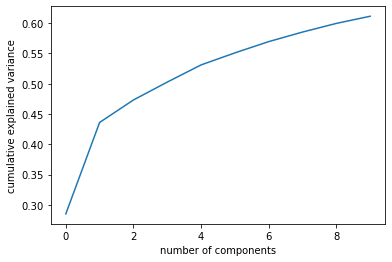

In [355]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

4 principal components are selected for further analysis.

The number of columns changed from 19472 to 4 after doing PCA and selecting no. of components=4.

In [356]:
df_pca = pd.concat([pd.DataFrame(data = x_pca),
df[['Severity']]],axis = 1)
df_pca.columns = ["c0", "c1","c2", "c3","c4", "c5","c6", "c7","c8", "c9","Severity"]
df_pca.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,Severity
0,98.978292,3.179455,-50.466519,-68.018814,41.951327,-29.427507,45.410357,22.015567,3.645744,-13.947239,NonICU
1,60.461812,8.919205,-12.488666,18.016099,14.403047,-30.671328,21.655229,-3.577396,-4.689619,15.744524,NonICU
2,-29.814824,-29.978427,-49.322819,-34.830861,10.986114,28.420047,-4.769721,33.351198,-2.076261,25.164250,NonICU
3,139.501402,23.521027,2.667220,0.315977,-30.980786,-19.253757,18.727682,-19.443347,-5.844582,1.496920,NonICU
4,-16.778022,-68.058041,13.772483,-36.179153,3.520074,25.704843,-14.620982,7.304374,-6.071422,-15.287169,NonICU


In [357]:
df_pca['Severity'].replace(to_replace=['NonICU', 'ICU'], value=[0, 1], inplace=True)
df_pca

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,Severity
0,98.978292,3.179455,-50.466519,-68.018814,41.951327,-29.427507,45.410357,22.015567,3.645744,-13.947239,0
1,60.461812,8.919205,-12.488666,18.016099,14.403047,-30.671328,21.655229,-3.577396,-4.689619,15.744524,0
2,-29.814824,-29.978427,-49.322819,-34.830861,10.986114,28.420047,-4.769721,33.351198,-2.076261,25.164250,0
3,139.501402,23.521027,2.667220,0.315977,-30.980786,-19.253757,18.727682,-19.443347,-5.844582,1.496920,0
4,-16.778022,-68.058041,13.772483,-36.179153,3.520074,25.704843,-14.620982,7.304374,-6.071422,-15.287169,0
...,...,...,...,...,...,...,...,...,...,...,...
121,-92.800291,78.742491,14.020826,-1.773632,-13.747459,4.698939,1.158678,1.379314,-10.924972,-15.334751,0
122,-60.282156,92.214475,-51.637397,-11.287626,-6.874595,-2.056443,2.790477,10.491232,12.602636,-14.775405,0
123,42.222124,63.433185,-23.410672,5.038637,-48.329080,-3.216211,0.858078,0.082085,4.682227,3.466785,0
124,-75.949997,136.469682,-16.977700,4.223213,-22.388645,19.980251,-13.818804,-13.528538,-9.350281,-29.431176,0


In [358]:
X_df_pca=df_pca.drop(columns=['Severity'])
y_df_pca=df_pca['Severity']

In [359]:
X_df_pca

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,98.978292,3.179455,-50.466519,-68.018814,41.951327,-29.427507,45.410357,22.015567,3.645744,-13.947239
1,60.461812,8.919205,-12.488666,18.016099,14.403047,-30.671328,21.655229,-3.577396,-4.689619,15.744524
2,-29.814824,-29.978427,-49.322819,-34.830861,10.986114,28.420047,-4.769721,33.351198,-2.076261,25.164250
3,139.501402,23.521027,2.667220,0.315977,-30.980786,-19.253757,18.727682,-19.443347,-5.844582,1.496920
4,-16.778022,-68.058041,13.772483,-36.179153,3.520074,25.704843,-14.620982,7.304374,-6.071422,-15.287169
...,...,...,...,...,...,...,...,...,...,...
121,-92.800291,78.742491,14.020826,-1.773632,-13.747459,4.698939,1.158678,1.379314,-10.924972,-15.334751
122,-60.282156,92.214475,-51.637397,-11.287626,-6.874595,-2.056443,2.790477,10.491232,12.602636,-14.775405
123,42.222124,63.433185,-23.410672,5.038637,-48.329080,-3.216211,0.858078,0.082085,4.682227,3.466785
124,-75.949997,136.469682,-16.977700,4.223213,-22.388645,19.980251,-13.818804,-13.528538,-9.350281,-29.431176


In [360]:

X_train, X_test, y_train, y_test = train_test_split(X_df_pca,y_df_pca,
                                                    test_size
                                                    =0.30,random_state=42)

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_test=knn.predict(X_test)

print(confusion_matrix(y_test,y_pred_test))
X_train.shape

[[12  9]
 [ 6 11]]


(88, 10)

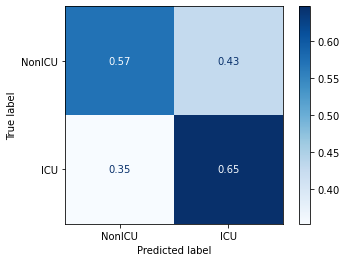

In [365]:
plot_confusion_matrix(knn,X_test,y_test,display_labels=['NonICU','ICU'],normalize='true',cmap='Blues');

In [366]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

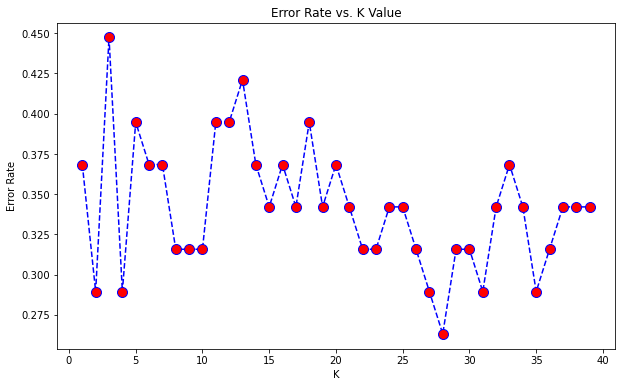

In [367]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [368]:


# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=28)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



WITH K=25


[[11 10]
 [ 0 17]]


              precision    recall  f1-score   support

           0       1.00      0.52      0.69        21
           1       0.63      1.00      0.77        17

    accuracy                           0.74        38
   macro avg       0.81      0.76      0.73        38
weighted avg       0.83      0.74      0.73        38



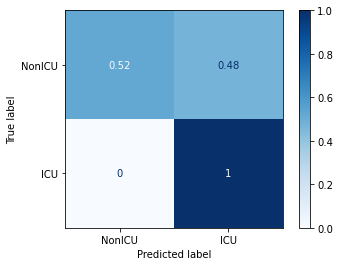

In [369]:
plot_confusion_matrix(knn,X_test,y_test,display_labels=['NonICU','ICU'],normalize='true',cmap='Blues');

In [338]:
print('Test Accuracy:', knn.score(X_test, y_test))
print('Training Accuracy:', knn.score(X_train, y_train))

Test Accuracy: 0.7368421052631579
Training Accuracy: 0.7159090909090909


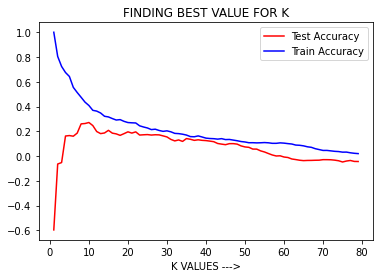

In [339]:
# To plot test accuracy and train accuracy Vs K value.
p = list(range(1, 80))
lst_test =[]
lst_train =[]
from sklearn.neighbors import KNeighborsRegressor
for i in p:
    
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    z = knn.score(X_test, y_test)
    t = knn.score(X_train, y_train)
    lst_test.append(z)
    lst_train.append(t)
      
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('K VALUES --->')
plt.title('FINDING BEST VALUE FOR K')
plt.legend()

From the above graph, we can conclude that when K is small i.e. K=1, Training Accuracy is High but Test Accuracy is Low which means the model is over-fitting ( High Variance or High Model Complexity). When the value of K is large i.e. K=50, Training Accuracy is Low as well as Test Accuracy is Low which means the model is under-fitting ( High Bias or Low Model Complexity ).

So Hyperparameter tuning is necessary i.e. to select the best value of K in KNN algorithm for which the model has Low Bias and Low Variance and results in a good model with high out of sample accuracy.

In [277]:
import sklearn.metrics as metrics

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.5789473684210527, 0.5526315789473685, 0.4473684210526316, 0.5789473684210527, 0.4473684210526316, 0.5, 0.5263157894736842, 0.5526315789473685, 0.5, 0.5263157894736842, 0.47368421052631576, 0.47368421052631576, 0.47368421052631576, 0.4473684210526316, 0.47368421052631576, 0.47368421052631576, 0.47368421052631576, 0.47368421052631576, 0.47368421052631576, 0.47368421052631576, 0.47368421052631576, 0.47368421052631576, 0.4473684210526316, 0.4473684210526316, 0.4473684210526316]


Training accuracy rises as model complexity increases
Testing accuracy penalizes models that are too complex or not complex enough
For KNN models, complexity is determined by the value of K (lower value = more complex)

In [278]:
# import k-folder
from sklearn.model_selection import cross_val_score


In [279]:
knn = KNeighborsClassifier(n_neighbors = 13)

In [280]:
scores = cross_val_score(knn, X_df_pca, y_df_pca, cv=5, scoring='accuracy')


In [281]:
print(scores)


[0.76923077 0.92       0.76       0.64       0.6       ]


In [282]:
print(scores.mean())

0.7378461538461539


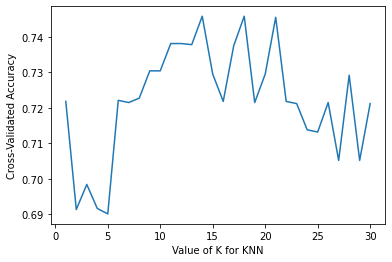

In [283]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_df_pca, y_df_pca, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

As we can see the best K is between 8,others  due to under-fitting.

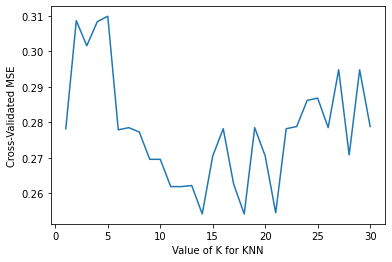

In [284]:
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(knn, X_df_pca, y_df_pca, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()


In [340]:
logit_model = LogisticRegression().fit(X_train, y_train)

In [341]:
y_predict_proba = logit_model.predict_proba(X_test)


In [342]:
cutoff = 0.5
y_predict = [int(proba[1] > cutoff) for proba in y_predict_proba]

In [344]:
M = confusion_matrix(y_test, y_predict)
n_samples = len(y_test)
print(M)
print('Accuracy:  %.2f' % ((M[0][0] + M[1][1]) / n_samples))
print('Precision: %.2f' % (M[1][1] / (M[0][1] + M[1][1])))
print('Recall:    %.2f' % (M[1][1] / (M[1][0] + M[1][1])))

[[18  3]
 [ 5 12]]
Accuracy:  0.79
Precision: 0.80
Recall:    0.71


In [289]:
#Fitting Classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500  ,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [290]:
#Predicting The Test Results
y_pred = classifier.predict(X_test)

In [291]:
#Making the confusion MAtrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test,y_pred)
print("The Confusion Matrix :")
print(cm)
print("Accuracy Percentage : ",ac*100,"%")


The Confusion Matrix :
[[12  9]
 [ 5 12]]
Accuracy Percentage :  63.1578947368421 %
